# Multivariate Case


In [3]:
import numpy as np
import matplotlib.pyplot as plt
monkey_data = np.random.multivariate_normal([1.0,2.0],[[1.5,0.5],[0.5,1]],1000)
chimp_data = np.random.multivariate_normal([4.0,4.0],[[1,0],[0,1.8]],1000)

print(monkey_data.shape)
print(chimp_data.shape) 

(1000, 2)
(1000, 2)


In [4]:
print(monkey_data[:5,:]) 

[[1.34806753 1.90577123]
 [0.60792118 1.52475823]
 [0.10550096 2.02083483]
 [0.56566269 2.03228369]
 [1.86713381 3.37346754]]


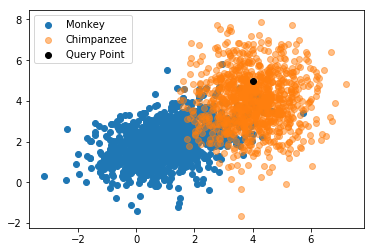

In [12]:
plt.scatter(monkey_data[:,0],monkey_data[:,1],label='Monkey')
plt.scatter(chimp_data[:,0],chimp_data[:,1],alpha=.5,label='Chimpanzee')

query_x = np.array([4,5])
plt.scatter(query_x[0],query_x[1],c='k',label='Query Point')
plt.legend()
plt.show()

# K-Nearest Neighbours

In [13]:
data = np.zeros((2000,3))
data[:1000,:-1] = monkey_data
data[1000:,:-1] = chimp_data
data[1000:,-1] = 1
print(data.shape)

(2000, 3)


In [14]:
print(data)

[[1.34806753 1.90577123 0.        ]
 [0.60792118 1.52475823 0.        ]
 [0.10550096 2.02083483 0.        ]
 ...
 [2.25675704 2.44283975 1.        ]
 [3.99444293 3.10763598 1.        ]
 [2.01083192 2.54465897 1.        ]]


In [15]:
x_train = data[:,:-1]
y_train = data[:,-1]

print(x_train.shape)
print(y_train.shape)

(2000, 2)
(2000,)


In [16]:
def dist(x1,x2):
    return np.sqrt(((x2-x1)**2).sum())
    
def knn(x_train,y_train,query_x,k=5):
    #First Step
    dist_vals = []
    
    m = x_train.shape[0]
    for ix in range(m):
        d = dist(query_x,x_train[ix])
        dist_vals.append((d,y_train[ix]))
        
    dist_vals = sorted(dist_vals)
    dist_vals = dist_vals[:k]
    
    y = np.array(dist_vals)
    t = np.unique(y[:,1],return_counts=True)
    index = t[1].argmax()
    prediction  = t[0][index]
    return prediction

In [17]:
knn(x_train,y_train,query_x)

1.0

Object `numpy` not found.
